<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/%2080.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

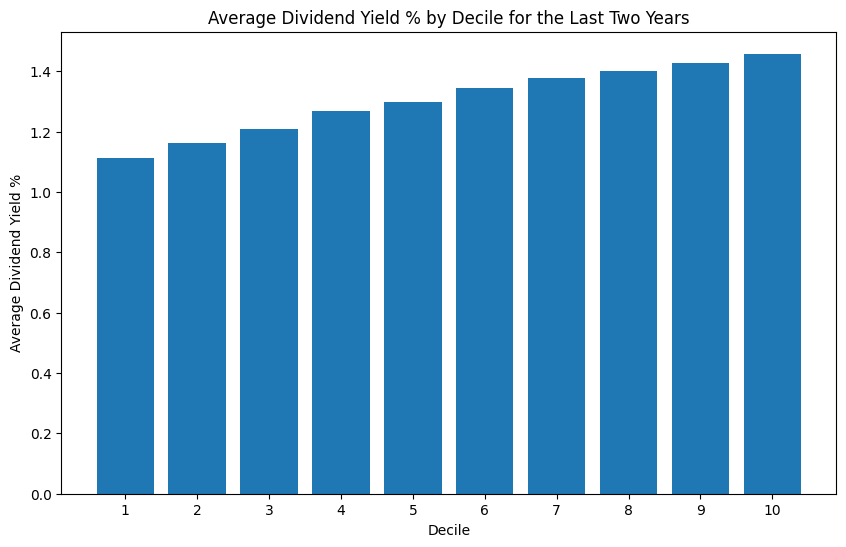

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('div.csv')

# Assuming 'Date' column is in the format 'YYYY-MM-DD', you can convert it to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Use 'coerce' to handle invalid date formats

# Drop rows with missing or invalid dates
df.dropna(subset=['Date'], inplace=True)

# Sort the DataFrame by date in ascending order
df.sort_values(by='Date', ascending=True, inplace=True)

# Filter data for the last two years
end_date = pd.Timestamp.now()
start_date = end_date - pd.DateOffset(years=2)
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Convert 'Div Yield %' column to numeric, handling non-numeric values
df['Div Yield %'] = pd.to_numeric(df['Div Yield %'], errors='coerce')

# Drop rows with missing or non-numeric values in 'Div Yield %' column
df.dropna(subset=['Div Yield %'], inplace=True)

# Calculate deciles for Div Yield %
df['Div Yield % Decile'] = pd.qcut(df['Div Yield %'], q=10, labels=False)

# Calculate the average Div Yield % for each decile
decile_avg_yield = df.groupby('Div Yield % Decile')['Div Yield %'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(decile_avg_yield.index, decile_avg_yield.values)
plt.xlabel('Decile')
plt.ylabel('Average Dividend Yield %')
plt.title('Average Dividend Yield % by Decile for the Last Two Years')
plt.xticks(np.arange(10), np.arange(1, 11))  # Rename x-axis labels from 0-9 to 1-10
plt.show()


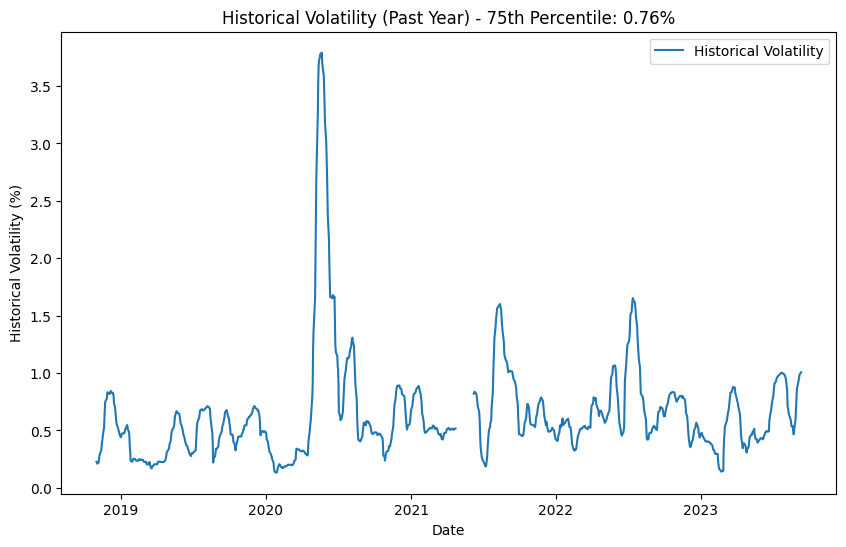

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('div.csv')

# Assuming 'Date' column is in the format 'YYYY-MM-DD', you can convert it to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Use 'coerce' to handle invalid date formats

# Drop rows with missing or invalid dates
df.dropna(subset=['Date'], inplace=True)

# Sort the DataFrame by date in ascending order
df.sort_values(by='Date', ascending=True, inplace=True)


# Calculate daily logarithmic returns for Div Yield %
df['Div Yield %'] = pd.to_numeric(df['Div Yield %'], errors='coerce')  # Convert to numeric, handling non-numeric values
df['Log Returns'] = np.log(1 + df['Div Yield %'] / 100)



# Calculate 30-day rolling standard deviation of logarithmic returns
rolling_std = df['Log Returns'].rolling(window=30).std()

# Shift the rolling standard deviation values by 30 days to align with correct periods
rolling_std = rolling_std.shift(periods=30)

# Multiply by the square root of 252 to annualize the volatility
historical_volatility_past_year = rolling_std * np.sqrt(252)

# Multiply by 100 to express as a percentage
historical_volatility_past_year *= 100

# Calculate the historical_volatility_past_year percentile
percentile_value = 75  # You can choose the percentile you want to calculate
volatility_percentile = np.percentile(historical_volatility_past_year.dropna(), percentile_value)

# Plot the historical volatility
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], historical_volatility_past_year, label='Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Historical Volatility (%)')
plt.title(f'Historical Volatility (Past Year) - {percentile_value}th Percentile: {volatility_percentile:.2f}%')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


TypeError: ignored

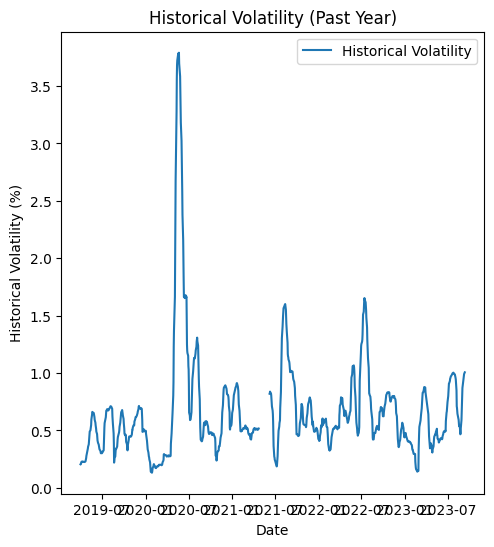

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

# Download Nifty 50 data from Yahoo Finance since 2019
nifty_data = yf.download('^NSEI', start='2019-01-01', end=pd.Timestamp.now())

# Read the CSV file with dividend yield data
df = pd.read_csv('div.csv')

# Assuming 'Date' column is in the format 'YYYY-MM-DD', you can convert it to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Use 'coerce' to handle invalid date formats

# Drop rows with missing or invalid dates
df.dropna(subset=['Date'], inplace=True)

# Sort the DataFrame by date in ascending order
df.sort_values(by='Date', ascending=True, inplace=True)

# Calculate daily logarithmic returns for Div Yield %
df['Div Yield %'] = pd.to_numeric(df['Div Yield %'], errors='coerce')  # Convert to numeric, handling non-numeric values
df['Log Returns'] = np.log(1 + df['Div Yield %'] / 100)

# Concatenate the dividend yield DataFrame with Nifty 50 data based on the 'Date' column
merged_df = pd.merge(df, nifty_data['Close'], on='Date', how='inner')
merged_df.set_index('Date', inplace=True)

# Calculate 30-day rolling standard deviation of logarithmic returns
rolling_std = merged_df['Log Returns'].rolling(window=30).std()

# Shift the rolling standard deviation values by 30 days to align with correct periods
rolling_std = rolling_std.shift(periods=30)

# Multiply by the square root of 252 to annualize the volatility
historical_volatility_past_year = rolling_std * np.sqrt(252) * 100

# Plot the data
plt.figure(figsize=(12, 6))

# Plot Historical Volatility (%) as a line plot
plt.subplot(1, 2, 1)
plt.plot(merged_df.index, historical_volatility_past_year, label='Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Historical Volatility (%)')
plt.title('Historical Volatility (Past Year)')
plt.legend()

# Plot Nifty 50 Close as a line plot
plt.subplot(1, 2)
plt.plot(merged_df.index, merged_df['Close'], label='Nifty 50 Close', color='orange')
plt.xlabel('Date')
plt.ylabel('Nifty 50 Close')
plt.title('Nifty 50 Close (Since 2019)')
plt.legend()

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


[*********************100%%**********************]  1 of 1 completed


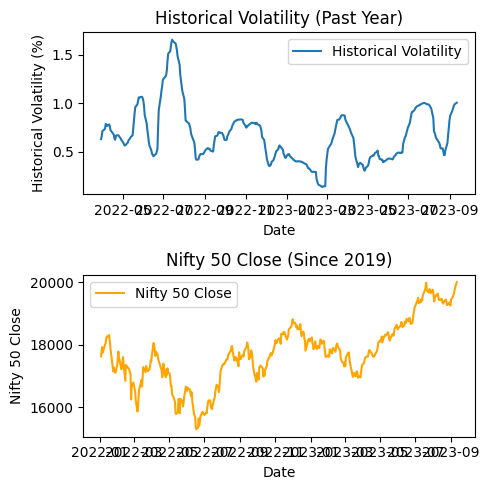

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

# Download Nifty 50 data from Yahoo Finance since 2019
nifty_data = yf.download('^NSEI', start='2022-01-01', end=pd.Timestamp.now())

# Read the CSV file with dividend yield data
df = pd.read_csv('div.csv')

# Assuming 'Date' column is in the format 'YYYY-MM-DD', you can convert it to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Use 'coerce' to handle invalid date formats

# Drop rows with missing or invalid dates
df.dropna(subset=['Date'], inplace=True)

# Sort the DataFrame by date in ascending order
df.sort_values(by='Date', ascending=True, inplace=True)

# Calculate daily logarithmic returns for Div Yield %
df['Div Yield %'] = pd.to_numeric(df['Div Yield %'], errors='coerce')  # Convert to numeric, handling non-numeric values
df['Log Returns'] = np.log(1 + df['Div Yield %'] / 100)

# Concatenate the dividend yield DataFrame with Nifty 50 data based on the 'Date' column
merged_df = pd.merge(df, nifty_data['Close'], on='Date', how='inner')
merged_df.set_index('Date', inplace=True)

# Calculate 30-day rolling standard deviation of logarithmic returns
rolling_std = merged_df['Log Returns'].rolling(window=30).std()

# Shift the rolling standard deviation values by 30 days to align with correct periods
rolling_std = rolling_std.shift(periods=30)

# Multiply by the square root of 252 to annualize the volatility
historical_volatility_past_year = rolling_std * np.sqrt(252) * 100

# Create separate subplots
fig, axs = plt.subplots(2,1, figsize=(5, 5))

# Plot Historical Volatility (%) as a line plot
axs[0].plot(merged_df.index, historical_volatility_past_year, label='Historical Volatility')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Historical Volatility (%)')
axs[0].set_title('Historical Volatility (Past Year)')
axs[0].legend()

# Plot Nifty 50 Close as a line plot
axs[1].plot(merged_df.index, merged_df['Close'], label='Nifty 50 Close', color='orange')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Nifty 50 Close')
axs[1].set_title('Nifty 50 Close (Since 2019)')
axs[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


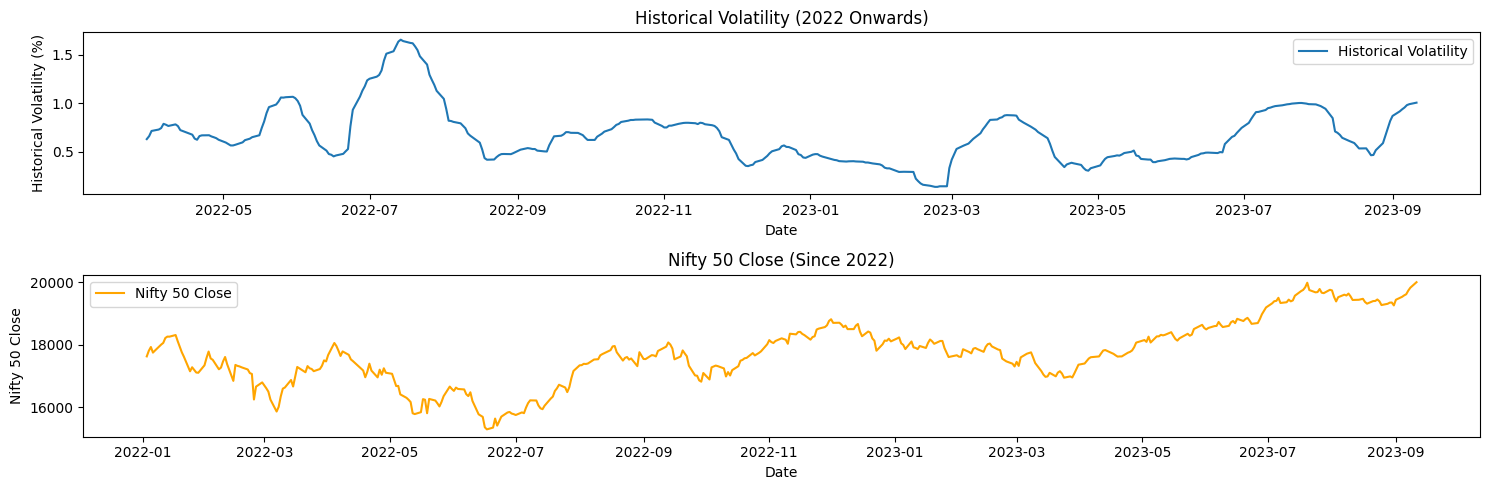

In [24]:

# Create separate subplots
fig, axs = plt.subplots(2,1, figsize=(15, 5))
# Plot Historical Volatility (%) as a line plot
axs[0].plot(merged_df.index, historical_volatility_past_year, label='Historical Volatility')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Historical Volatility (%)')
axs[0].set_title('Historical Volatility (2022 Onwards)')
axs[0].legend()

# Plot Nifty 50 Close as a line plot
axs[1].plot(merged_df.index, merged_df['Close'], label='Nifty 50 Close', color='orange')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Nifty 50 Close')
axs[1].set_title('Nifty 50 Close (Since 2022)')
axs[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


[*********************100%%**********************]  1 of 1 completed


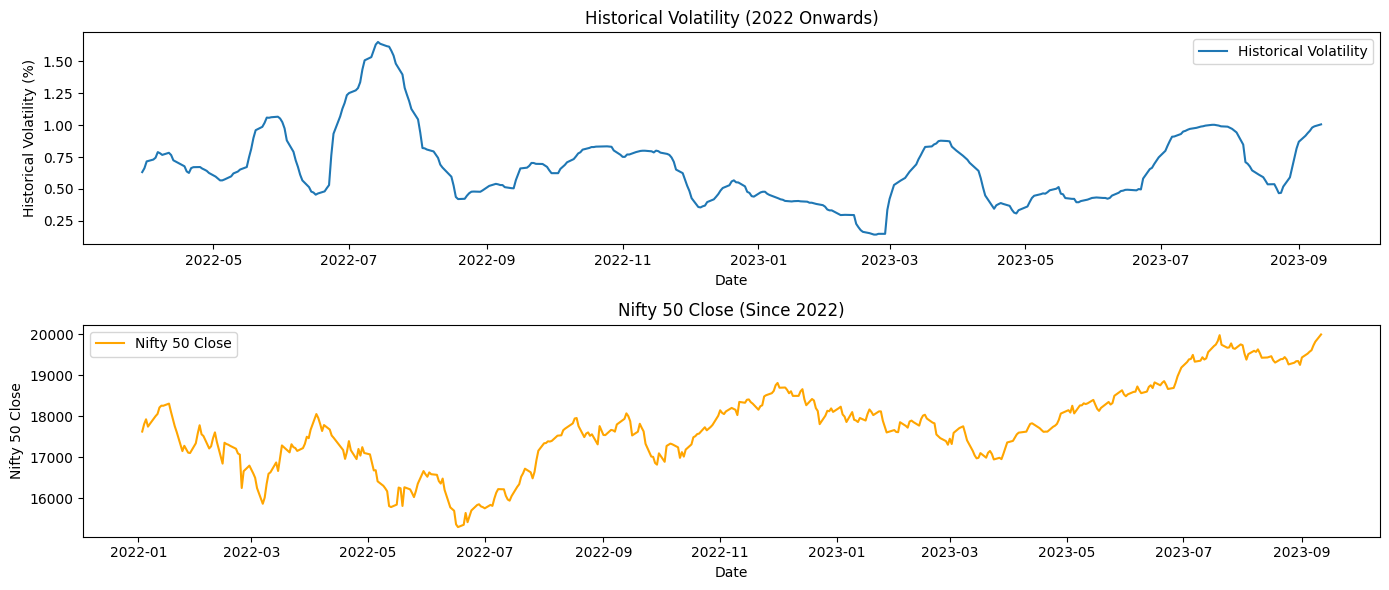

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import warnings
from matplotlib.dates import date2num

# Suppress warnings
warnings.filterwarnings("ignore")

# Download Nifty 50 data from Yahoo Finance since 2019
nifty_data = yf.download('^NSEI', start='2019-01-01', end=pd.Timestamp.now())

# Read the CSV file with dividend yield data
df = pd.read_csv('div.csv')

# Assuming 'Date' column is in the format 'YYYY-MM-DD', you can convert it to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Use 'coerce' to handle invalid date formats

# Filter data for the year 2022 and onwards
start_date = pd.Timestamp('2022-01-01')
df = df[df['Date'] >= start_date]

# Sort the DataFrame by date in ascending order
df.sort_values(by='Date', ascending=True, inplace=True)

# Calculate daily logarithmic returns for Div Yield %
df['Div Yield %'] = pd.to_numeric(df['Div Yield %'], errors='coerce')  # Convert to numeric, handling non-numeric values
df['Log Returns'] = np.log(1 + df['Div Yield %'] / 100)

# Concatenate the dividend yield DataFrame with Nifty 50 data based on the 'Date' column
merged_df = pd.merge(df, nifty_data['Close'], on='Date', how='inner')
merged_df.set_index('Date', inplace=True)

# Calculate 30-day rolling standard deviation of logarithmic returns
rolling_std = merged_df['Log Returns'].rolling(window=30).std()

# Shift the rolling standard deviation values by 30 days to align with correct periods
rolling_std = rolling_std.shift(periods=30)

# Multiply by the square root of 252 to annualize the volatility
historical_volatility_past_year = rolling_std * np.sqrt(252) * 100

# Convert dates to numerical values
date_num = date2num(merged_df.index.to_pydatetime())

# Create separate subplots
fig, axs = plt.subplots(2,1, figsize=(14, 6))

# Plot Historical Volatility (%) as a line plot
axs[0].plot(date_num, historical_volatility_past_year, label='Historical Volatility')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Historical Volatility (%)')
axs[0].set_title('Historical Volatility (2022 Onwards)')
axs[0].legend()
axs[0].xaxis_date()  # Set the x-axis to display dates

# Plot Nifty 50 Close as a line plot
axs[1].plot(date_num, merged_df['Close'], label='Nifty 50 Close', color='orange')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Nifty 50 Close')
axs[1].set_title('Nifty 50 Close (Since 2022)')
axs[1].legend()
axs[1].xaxis_date()  # Set the x-axis to display dates

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


[*********************100%%**********************]  1 of 1 completed


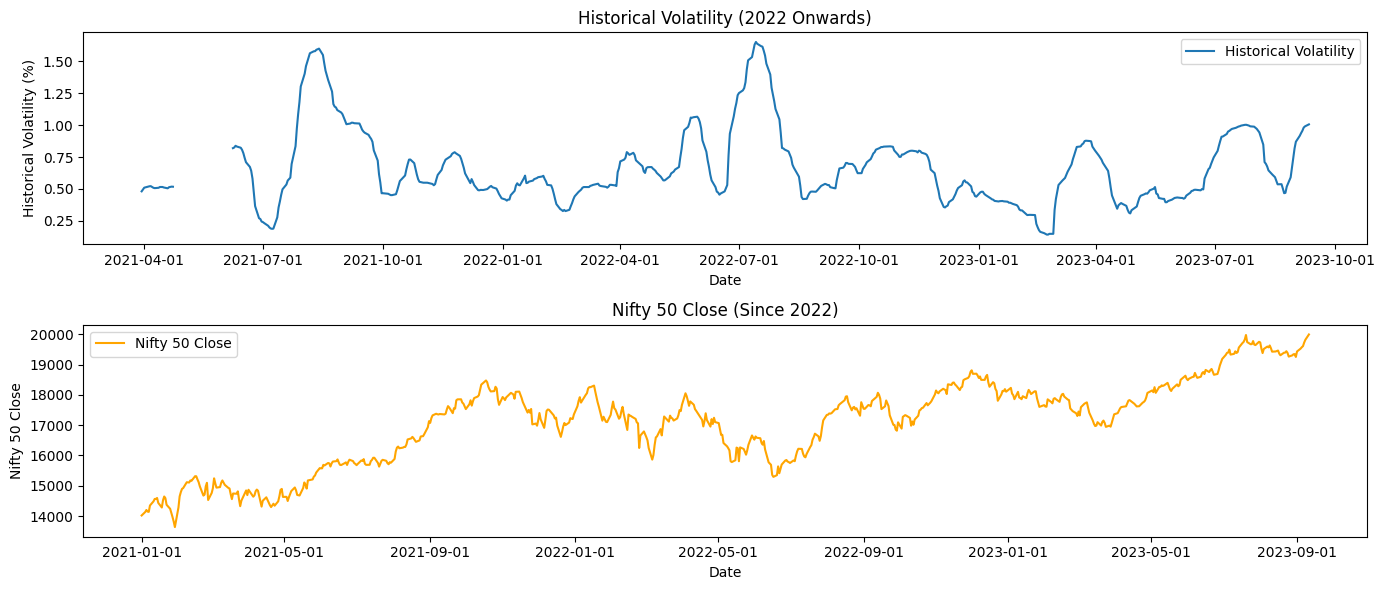

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import warnings
from matplotlib.dates import DateFormatter

# Suppress warnings
warnings.filterwarnings("ignore")

# Download Nifty 50 data from Yahoo Finance since 2019
nifty_data = yf.download('^NSEI', start='2019-01-01', end=pd.Timestamp.now())

# Read the CSV file with dividend yield data
df = pd.read_csv('div.csv')

# Assuming 'Date' column is in the format 'YYYY-MM-DD', you can convert it to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Use 'coerce' to handle invalid date formats

# Filter data for the year 2022 and onwards
start_date = pd.Timestamp('2021-01-01')
df = df[df['Date'] >= start_date]

# Sort the DataFrame by date in ascending order
df.sort_values(by='Date', ascending=True, inplace=True)

# Calculate daily logarithmic returns for Div Yield %
df['Div Yield %'] = pd.to_numeric(df['Div Yield %'], errors='coerce')  # Convert to numeric, handling non-numeric values
df['Log Returns'] = np.log(1 + df['Div Yield %'] / 100)

# Concatenate the dividend yield DataFrame with Nifty 50 data based on the 'Date' column
merged_df = pd.merge(df, nifty_data['Close'], on='Date', how='inner')
merged_df.set_index('Date', inplace=True)

# Calculate 30-day rolling standard deviation of logarithmic returns
rolling_std = merged_df['Log Returns'].rolling(window=30).std()

# Shift the rolling standard deviation values by 30 days to align with correct periods
rolling_std = rolling_std.shift(periods=30)

# Multiply by the square root of 252 to annualize the volatility
historical_volatility_past_year = rolling_std * np.sqrt(252) * 100

# Create separate subplots
fig, axs = plt.subplots(2,1, figsize=(14, 6))

# Plot Historical Volatility (%) as a line plot
axs[0].plot(merged_df.index, historical_volatility_past_year, label='Historical Volatility')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Historical Volatility (%)')
axs[0].set_title('Historical Volatility (2022 Onwards)')
axs[0].legend()
axs[0].xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))  # Format the x-axis to display dates

# Plot Nifty 50 Close as a line plot
axs[1].plot(merged_df.index, merged_df['Close'], label='Nifty 50 Close', color='orange')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Nifty 50 Close')
axs[1].set_title('Nifty 50 Close (Since 2022)')
axs[1].legend()
axs[1].xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))  # Format the x-axis to display dates

# Adjust spacing between subplots
plt.tight_layout()

plt.show()
